In [2]:
import numpy as np
import scipy.special as sps
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [45]:
def log_likelihood_gamma(alpha,beta,y):
    
    N=len(y)
    
    return N*(alpha-1)*np.mean(np.log(y))-N*np.log(sps.gamma(alpha))-N*alpha*np.log(beta)-N*np.mean(y)/beta
    


In [3]:
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)

In [71]:
def calculate_posterior(path,Js,beta1s,beta2s,alpha=3/2):
    
    data=np.genfromtxt(path,skip_header=1,delimiter=',')[:,:-1]
    data=1-data
    
    total=np.zeros((len(beta1s),len(beta2s)))
    
    for J,row in zip(Js,data):
    
        matrix=[[log_likelihood_gamma(alpha,beta1+J*beta2,row) for beta2 in beta2s] for beta1 in beta1s]
        total+=np.array(matrix)
    
    return total


In [72]:
upper=(2/3*sigma**2)*5
lower=(2/3*sigma**2)*0.4

beta1s=np.linspace(-0.0005,0.0005,100)
beta2s=np.linspace(lower,upper,100)

results=calculate_posterior('Results/Harris2/DC-0703-191848.txt',Js,beta1s,beta2s)

<IPython.core.display.Javascript object>


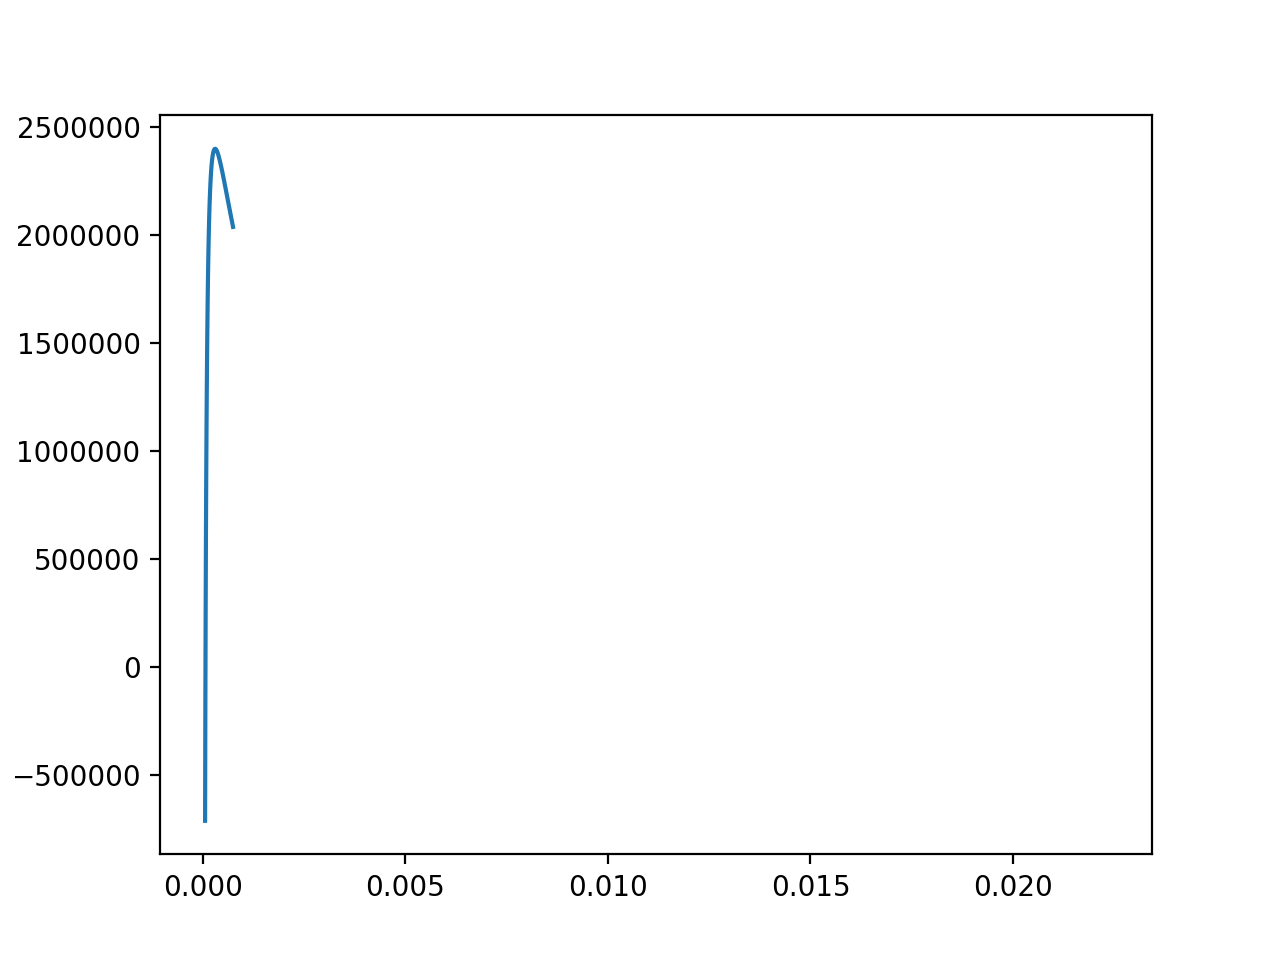

In [75]:
plt.plot(beta2s,np.sum(results,axis=0))

In [5]:
sigma=0.015
Js=np.array([20,40,60,80,100])

means=1-3/2*sigma**2*Js

betas=(2/3)*Js*sigma**2
alpha=3/2

n_data=10

In [6]:
data1= np.random.gamma(alpha, betas[0], 2000)
data2= np.random.gamma(alpha, betas[1], 2000)
data3= np.random.gamma(alpha, betas[2], n_data)
data4= np.random.gamma(alpha, betas[3], n_data)
data5= np.random.gamma(alpha, betas[4], n_data)

In [33]:
upper=(2/3*sigma**2)*2
lower=(2/3*sigma**2)*0.4

beta1s=np.linspace(-0.0005,0.0005,100)
beta2s=np.linspace(lower,upper,100)


In [34]:
matrix1=[[log_likelihood_gamma(alpha,beta1+Js[0]*beta2,data1,n_data) for beta2 in beta2s] for beta1 in beta1s]
matrix2=[[log_likelihood_gamma(alpha,beta1+Js[1]*beta2,data2,n_data) for beta2 in beta2s] for beta1 in beta1s]
matrix3=[[log_likelihood_gamma(alpha,beta1+Js[2]*beta2,data3,n_data) for beta2 in beta2s] for beta1 in beta1s]
matrix4=[[log_likelihood_gamma(alpha,beta1+Js[3]*beta2,data4,n_data) for beta2 in beta2s] for beta1 in beta1s]
matrix5=[[log_likelihood_gamma(alpha,beta1+Js[4]*beta2,data5,n_data) for beta2 in beta2s] for beta1 in beta1s]


M_total=np.array(matrix1)+np.array(matrix2)+np.array(matrix3)+np.array(matrix4)+np.array(matrix5)

<IPython.core.display.Javascript object>


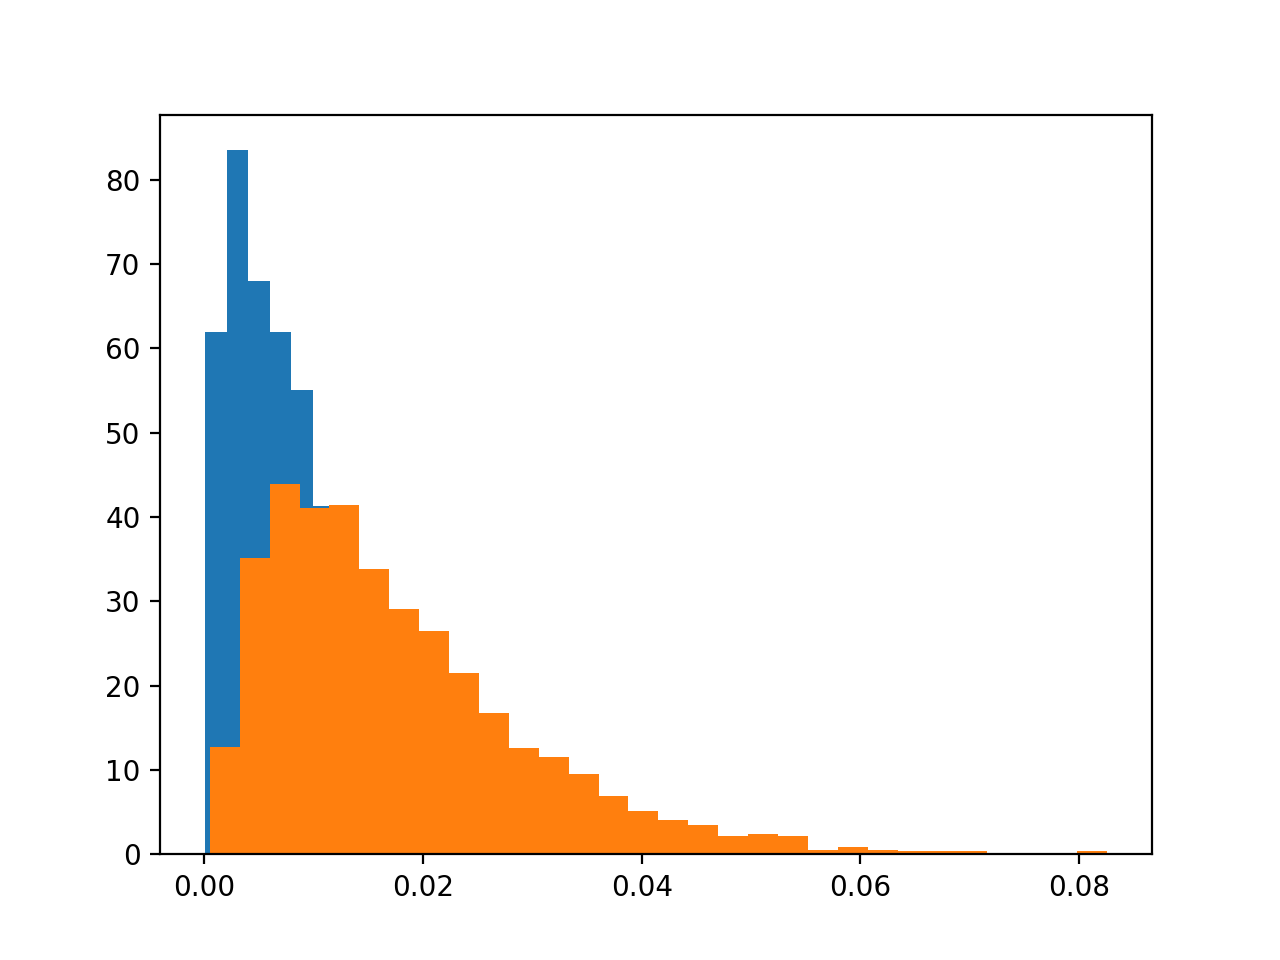

(array([12.79440842, 35.09323452, 43.86654315, 41.1248842 , 41.49043873,
        33.81379368, 29.06158484, 26.50270315, 21.56771705, 16.81550821,
        12.61163116, 11.51496758,  9.50441768,  6.945536  ,  5.11776337,
         4.02109979,  3.472768  ,  2.19332716,  2.37610442,  2.19332716,
         0.54833179,  0.91388632,  0.54833179,  0.36555453,  0.36555453,
         0.36555453,  0.        ,  0.        ,  0.        ,  0.36555453]),
 array([0.00049694, 0.00323251, 0.00596808, 0.00870365, 0.01143922,
        0.01417479, 0.01691036, 0.01964593, 0.0223815 , 0.02511707,
        0.02785264, 0.03058821, 0.03332378, 0.03605935, 0.03879492,
        0.04153049, 0.04426606, 0.04700163, 0.0497372 , 0.05247277,
        0.05520834, 0.05794391, 0.06067948, 0.06341505, 0.06615062,
        0.06888619, 0.07162176, 0.07435733, 0.0770929 , 0.07982847,
        0.08256404]),
 <a list of 30 Patch objects>)

In [85]:
plt.hist(data2,bins=30,density=1)



<IPython.core.display.Javascript object>


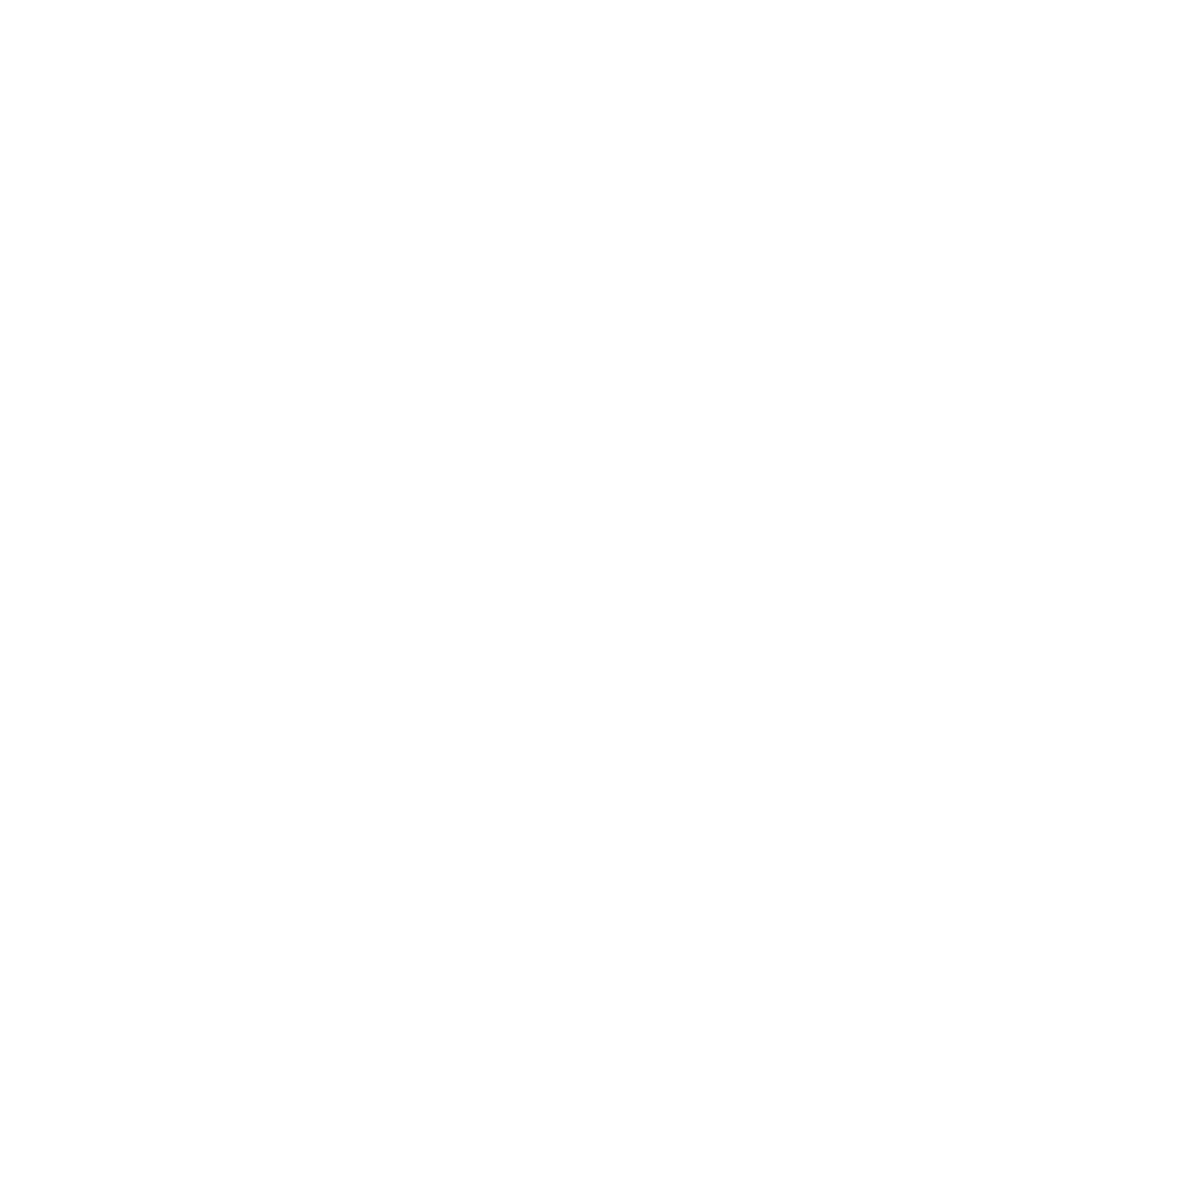

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [9]:
vx,vy=np.meshgrid(beta1s,beta2s)
%matplotlib notebook
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(vx,vy,np.array(M_total))



In [135]:
np.array(matrix1).reshape(100,100)

array([[2881.05981426, 2881.75143774, 2882.44211093, ..., 2943.9275302 ,
        2944.53334522, 2945.13833869],
       [2914.18146094, 2914.82773614, 2915.47312969, ..., 2972.95169422,
        2973.51825216, 2974.0840458 ],
       [2945.13833869, 2945.74251181, 2946.34586579, ..., 3000.09942259,
        3000.62943627, 3001.15873799],
       ...,
       [3203.11940436, 3203.03894729, 3202.9584825 , ..., 3195.28019605,
        3195.19902429, 3195.11784553],
       [3199.12764575, 3199.0468152 , 3198.96597729, ..., 3191.25391929,
        3191.17240925, 3191.09089256],
       [3195.11784553, 3195.03665977, 3194.95546701, ..., 3187.21131302,
        3187.12948172, 3187.04764411]])

In [272]:
means=[np.mean(data1),np.mean(data2),np.mean(data3),np.mean(data4),np.mean(data5)]

<IPython.core.display.Javascript object>


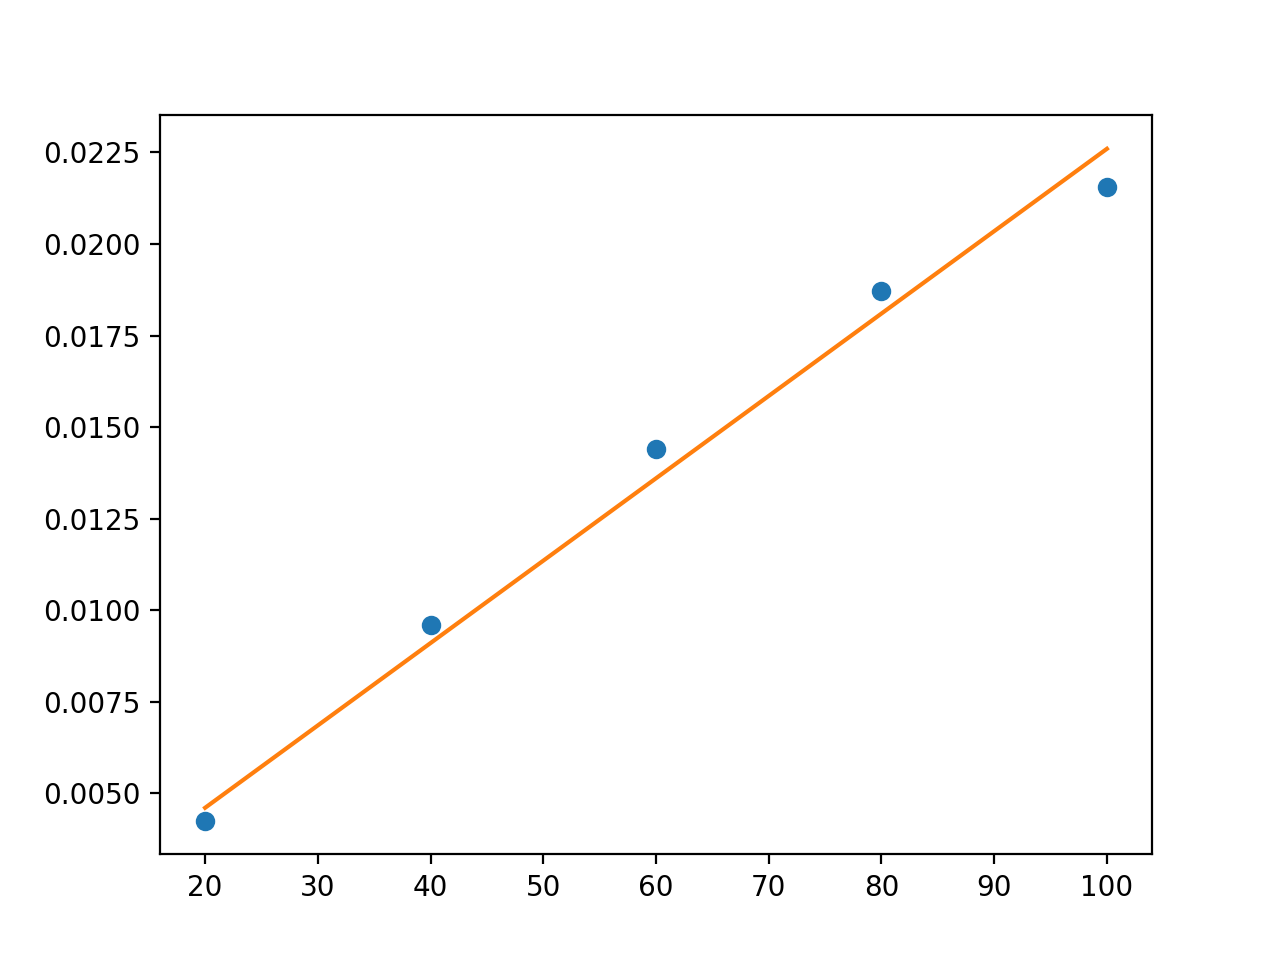

In [273]:
plt.plot(Js,means,"o")
plt.plot(Js,0.0001+(0.015**2)*Js)

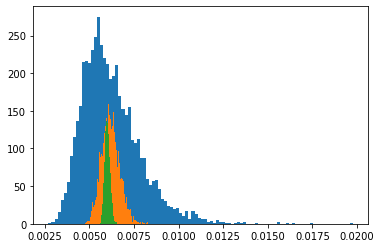

In [38]:
a=plt.hist(1/np.random.gamma(1+10*(3/2), 1/np.sum(data2[0:10]), 5000),bins=100)
a=plt.hist(1/np.random.gamma(1+100*(3/2), 1/np.sum(data2[0:100]), 5000),bins=100)
a=plt.hist(1/np.random.gamma(1+1000*(3/2),1/np.sum(data2[0:1000]), 5000),bins=100)

In [53]:
np.sqrt((0.0060*3/2)/40)

0.015000000000000001

In [52]:
(2/3)*40*sigma**2

0.005999999999999999

In [41]:
len(data2)

2000

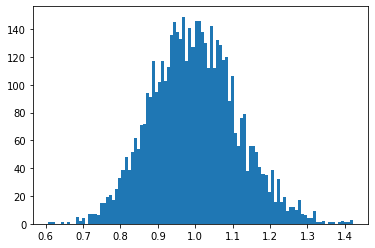

In [37]:
a=plt.hist(np.random.gamma(3/2*50,2/3/50, 5000),bins=100)